In [2]:
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [32]:
#!pip install mahotas
#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

#--------------------
# tunable-parameters
#--------------------

data_dir = 'dogs/working/resized'
output_dir = 'dogs/output/skmodel_raw'
train_path       = f"{data_dir}/train"
test_path       = f"{data_dir}/test"
h5_data_train          = f'{output_dir}/data_train.h5'
h5_labels_train        = f'{output_dir}/labels_train.h5'
h5_data_test          = f'{output_dir}/data_test.h5'
h5_labels_test        = f'{output_dir}/labels_test.h5'

In [19]:
# Get Training Data
train_df = pd.read_csv(data_dir+'/train_labels_top20.csv')

# Get Test Data
test_df = pd.read_csv(data_dir+'/test_labels_top20.csv')

In [20]:
# get the training labels
train_labels = list(set(train_df.label_name.values))

# get the training labels
test_labels = list(set(test_df.label_name.values))

# sort the training labels
train_labels.sort()
print(train_labels)
test_labels.sort()
print(test_labels)

# empty lists to hold feature vectors and labels
global_features_train = []
labels_train          = []

# empty lists to hold feature vectors and labels
global_features_test = []
labels_test          = []

['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02086910-papillon', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']
['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02086910-papillon', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']


In [30]:
import os

# loop over the training data sub-folders
for training_name in train_labels:
    # join the training data path and each species training folder
    train_dir = os.path.join(train_path, training_name)
    test_dir = os.path.join(test_path, training_name)
    
    # get the current training label
    current_label = training_name


    # Process training directory
    images = os.listdir(train_dir)
    
    # print(len(images))
    for img in images:

        # # get the image file name
        file = train_dir + "/" + img 

        # read the image and resize it to a fixed-size
        image = cv2.imread(file)

        ####################################
        # Global Feature extraction
        ####################################
        # convert image into a 1-dimensional numpy array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_1d = image.flatten()

    
        ###################################
        # Concatenate global features
        ###################################
        
        global_feature = image_1d

        # update the list of labels and feature vectors
        labels_train.append(current_label)
        global_features_train.append(global_feature)

    print("[STATUS] training processed folder: {}".format(current_label))

    # Process test directory
    #list images in the directory
    images = os.listdir(test_dir)
    
    # print(len(images))
    for img in images:

        # # get the image file name
        file = test_dir + "/" + img 

        # read the image and resize it to a fixed-size
        image = cv2.imread(file)
        # image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_1d = image.flatten()

        ###################################
        # Concatenate global features
        ###################################
        
        global_feature = image_1d

        # update the list of labels and feature vectors
        labels_test.append(current_label)
        global_features_test.append(global_feature)

    print("[STATUS] test processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")


[STATUS] training processed folder: n02085936-Maltese_dog
[STATUS] test processed folder: n02085936-Maltese_dog
[STATUS] training processed folder: n02086240-Shih-Tzu
[STATUS] test processed folder: n02086240-Shih-Tzu
[STATUS] training processed folder: n02086910-papillon
[STATUS] test processed folder: n02086910-papillon
[STATUS] training processed folder: n02088094-Afghan_hound
[STATUS] test processed folder: n02088094-Afghan_hound
[STATUS] training processed folder: n02090721-Irish_wolfhound
[STATUS] test processed folder: n02090721-Irish_wolfhound
[STATUS] training processed folder: n02091831-Saluki
[STATUS] test processed folder: n02091831-Saluki
[STATUS] training processed folder: n02092002-Scottish_deerhound
[STATUS] test processed folder: n02092002-Scottish_deerhound
[STATUS] training processed folder: n02095889-Sealyham_terrier
[STATUS] test processed folder: n02095889-Sealyham_terrier
[STATUS] training processed folder: n02096051-Airedale
[STATUS] test processed folder: n0209

In [34]:
# get the overall feature vector size
print("[STATUS] train feature vector size {}".format(np.array(global_features_train).shape))
print("[STATUS] test feature vector size {}".format(np.array(global_features_test).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels_train).shape))
print("[STATUS] test Labels {}".format(np.array(labels_test).shape))

# encode the target labels
targetNames = np.unique(labels_train)
le          = LabelEncoder()
le.fit(labels_train)
target_train      =  le.transform(labels_train)
target_test      = le.transform(labels_test)

print("[STATUS] training labels encoded...")
print("[STATUS] testing labels encoded...")

# scale features in the range (0-1)
scaler  = MinMaxScaler(feature_range=(0, 1))
rescaled_features_train = scaler.fit_transform(global_features_train)
rescaled_features_test = scaler.fit_transform(global_features_test)
print("[STATUS] feature vector normalized...")

print("[STATUS] train target labels: {}".format(target_train))
print("[STATUS] train target labels shape: {}".format(target_train.shape))

print("[STATUS] test target labels: {}".format(target_test))
print("[STATUS] test target labels shape: {}".format(target_test.shape))

# save the feature vector using HDF5
h5f_data_train = h5py.File(h5_data_train, 'w')
h5f_data_train.create_dataset('dataset_1', data=np.array(rescaled_features_train))

h5f_data_test = h5py.File(h5_data_test, 'w')
h5f_data_test.create_dataset('dataset_1', data=np.array(rescaled_features_test))


h5f_label_train = h5py.File(h5_labels_train, 'w')
h5f_label_train.create_dataset('dataset_1', data=np.array(target_train))

h5f_label_test = h5py.File(h5_labels_test, 'w')
h5f_label_test.create_dataset('dataset_1', data=np.array(target_test))

h5f_data_train.close()
h5f_label_train.close()
h5f_data_test.close()
h5f_label_test.close()


print("[STATUS] end of training..")

[STATUS] train feature vector size (3417, 154587)
[STATUS] test feature vector size (825, 154587)
[STATUS] training Labels (3417,)
[STATUS] test Labels (825,)
[STATUS] training labels encoded...
[STATUS] testing labels encoded...
[STATUS] feature vector normalized...
[STATUS] train target labels: [ 0  0  0 ... 19 19 19]
[STATUS] train target labels shape: (3417,)
[STATUS] test target labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4

Load in the data

In [35]:
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.externals import joblib

warnings.filterwarnings('ignore')

#--------------------
# tunable-parameters
#--------------------
num_trees = 100
# test_size = 0.10
seed      = 123

scoring    = "accuracy"

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))
models.append(('NN', MLPClassifier(random_state=seed)))

# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data_train  = h5py.File(h5_data_train, 'r')
h5f_label_train = h5py.File(h5_labels_train, 'r')

global_features_string_train = h5f_data_train['dataset_1']
global_labels_string_train   = h5f_label_train['dataset_1']

global_features_train = np.array(global_features_string_train)
global_labels_train   = np.array(global_labels_string_train)

h5f_data_train.close()
h5f_label_train.close()

# import the feature vector and trained labels
h5f_data_test  = h5py.File(h5_data_test, 'r')
h5f_label_test = h5py.File(h5_labels_test, 'r')

global_features_string_test = h5f_data_test['dataset_1']
global_labels_string_test   = h5f_label_test['dataset_1']

global_features_test = np.array(global_features_string_test)
global_labels_test   = np.array(global_labels_string_test)

h5f_data_test.close()
h5f_label_test.close()


# verify the shape of the feature vector and labels
print("[STATUS] train features shape: {}".format(global_features_train.shape))
print("[STATUS] train labels shape: {}".format(global_labels_train.shape))
print("[STATUS] test features shape: {}".format(global_features_test.shape))
print("[STATUS] test labels shape: {}".format(global_labels_test.shape))

print("[STATUS] training started...")

[STATUS] train features shape: (3417, 154587)
[STATUS] train labels shape: (3417,)
[STATUS] test features shape: (825, 154587)
[STATUS] test labels shape: (825,)
[STATUS] training started...


In [36]:
# split the training and testing data
# (trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
#                                                                                           np.array(global_labels),
#                                                                                           test_size=test_size,
#                                                                                           random_state=seed)

trainDataGlobal = np.array(global_features_train)
testDataGlobal = np.array(global_features_train)
trainLabelsGlobal = np.array(global_labels_train)
testLabelsGlobal = np.array(global_labels_test)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (3417, 154587)
Test data   : (3417, 154587)
Train labels: (3417,)
Test labels : (825,)


LR: 0.206330 (0.019121)
Time to Train 909.9360132217407
LDA: 0.169147 (0.025773)
Time to Train 1707.2374799251556
KNN: 0.171787 (0.017938)
Time to Train 44.09794211387634
CART: 0.126708 (0.017718)
Time to Train 5074.112898111343
RF: 0.265735 (0.023702)
Time to Train 849.8707809448242
NB: 0.228553 (0.022012)
Time to Train 139.10767817497253
SVM: 0.296168 (0.026767)
Time to Train 11293.600455999374
NN: 0.051797 (0.011322)
Time to Train 3758.7922868728638


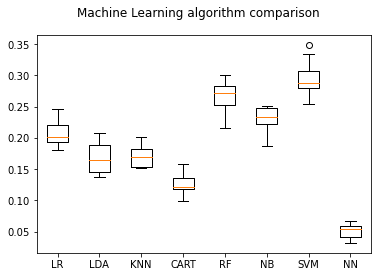

In [37]:
import time 

# 10-fold cross validation
for name, model in models:
    start = time.time()
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    end = time.time()
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(f"Time to Train {end-start}")

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## K-Nearest Neighbors (KNN)

### KNN Base Raw Model (Default Parameters)

In [17]:
X_train = x_train_1d_top20
y_train = y_train_top20 
X_test = x_test_1d_top20
y_test = y_test_top20

import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

start = time.time()
neigh = KNeighborsClassifier().fit(X_train,y_train)
ypred_knn_base = neigh.predict(X_test)
end = time.time()
duration_knn_base = end - start

accuracy_knn_base = metrics.accuracy_score(y_test, ypred_knn_base)

print(f"Accuracy of base KNN model is {accuracy_knn_base}")
print(f"Time to tune default KNN is {duration_knn_base}")

Accuracy of base KNN model is 0.19757575757575757
Time to tune default KNN is 7.2132861614227295


### KNN Raw Model Cross Validation (Run on Server Crashes Laptop)

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

n_splits = 3
n_repeats = 3
random_state = 123


start = time.time()
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 20, 1)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
end = time.time()
duration_knn_cv = end - start  
print(f"Time to Cross Validate KNN is {duration_knn_cv}")  

/Users/teresa.dong/opt/anaconda3/envs/isye6740/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

Actually it appears that cross validation crashes the computer, let's not cross validate for now

## SVM

### SVM Base Model (Default Parameters)

In [18]:
from sklearn.svm import SVC
start = time.time()
model_svm = SVC()
model_svm.fit(X_train,y_train)
yhat_svm = model_svm.predict(X_test)
end = time.time()
duration_svm_base = end - start
print("Accuracy of default SVM is",metrics.accuracy_score(y_test, yhat_svm))
print(f"Time to tune default SVM is {duration_svm_base}")

Accuracy of default SVM is 0.32484848484848483
Time to tune default SVM is 1471.6981060504913


### SVM Base Model (Cross Validation)

In [ ]:
# define model and parameters
start = time.time()
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid','linear']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = [1, 0.1, 0.01, 0.001, 0.0001,'scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

end = time.time()
duration_svm_cv = end - start  

print(f"Time to Cross Validate SVM is {duration_svm_cv}")  

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
start = time.time()
model_log = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model_log.fit(X_train,y_train)
yhat_log = model_log.predict(X_test)
print("Accuracy of default Multinomial Logistic model is",metrics.accuracy_score(y_test, yhat_log))
end = time.time()
duration_log_base = end - start  
print("Accuracy of default LogReg is",metrics.accuracy_score(y_test, yhat_log))
print(f"Time to tune default LogReg is {duration_log_base}")

/Users/teresa.dong/opt/anaconda3/envs/isye6740/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of default Multinomial Logistic model is 0.23515151515151514
Accuracy of default LogReg is 0.23515151515151514
Time to tune default LogReg is 886.0278468132019


In [ ]:
# define models and parameters
model = LogisticRegression(max_iter=1000)
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg','lbfgs']
mcs = ['multinomial']

# define grid search
grid = dict(penalty=penalty,C=c_values,solver=solvers,multi_class=mcs)
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,verbose=True)
grid_result = grid_search.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']  
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Neural Networks

In [21]:
from sklearn.neural_network import MLPClassifier
start = time.time()
model_nn = MLPClassifier()
model_nn.fit(X_train,y_train)
yhat_nn = model_nn.predict(X_test)
print("Accuracy of default Neural Network is",metrics.accuracy_score(y_test, yhat_nn))
end = time.time()
duration_nn_base = end - start  
print("Accuracy of default Neural Network is",metrics.accuracy_score(y_test, yhat_nn))
print(f"Time to tune default Neural Network is {duration_nn_base}")

Accuracy of default Neural Network is 0.052121212121212124
Accuracy of default Neural Network is 0.052121212121212124
Time to tune default Neural Network is 459.49992418289185


In [22]:
from sklearn.neural_network import MLPClassifier
start = time.time()
model_nn = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
model_nn.fit(X_train,y_train)
yhat_nn = model_nn.predict(X_test)
print("Accuracy of default Neural Network is",metrics.accuracy_score(y_test, yhat_nn))
end = time.time()
duration_nn_base = end - start  
print("Accuracy of default Neural Network is",metrics.accuracy_score(y_test, yhat_nn))
print(f"Time to tune default Neural Network is {duration_nn_base}")

Accuracy of default Neural Network is 0.06666666666666667
Accuracy of default Neural Network is 0.06666666666666667
Time to tune default Neural Network is 154.24200105667114


In [ ]:
# define model and parameters
model = MLPClassifier()
activation = ['tanh','relu','lbfgs']
solver = ['sgd','adam']
alpha=[0.0001,0.05]
learning_rate=['constant']
max_iter=[1000]


# define grid search
grid = dict(activation=activation, solver=solver, hidden_layer_sizes=hidden_layer_sizes, alpha=alpha,
            learning_rate=learning_rate, max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,verbose=True)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


## Random Forest